<a href="https://colab.research.google.com/github/PrachiJadhav12/Hotel-Booking-Data_Analysis/blob/main/Capstone_Project_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from seaborn.rcmod import set_style
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [73]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
df_original = pd.read_csv('/content/drive/MyDrive/Data Set/SeoulBikeData.csv', encoding= 'unicode_escape')

In [75]:
#Making a copy of dataset for safety purpose
df = df_original.copy()

In [76]:
df.shape

(8760, 14)

In [77]:
#describe the data set
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [79]:
#describing the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [80]:
#finding null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [81]:
#checking unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [82]:
#checking duplicate values
print(len(df[df.duplicated()]))

0


Observations:
There is no missing and duplicate values in the dataset.

## **Data Cleaning**

In [83]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [84]:
#Changing data feature into three different feature Day,Month, Year
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [85]:
#converting day into binary class as weekdays = 0 and weekend = 1
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [86]:
#dropping unncessary column
df=df.drop(columns=['Date','day','year'],axis=1)

**Year basically contains details from 2017 december to 2018 november so we considers this as one year.**

In [87]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [88]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [89]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


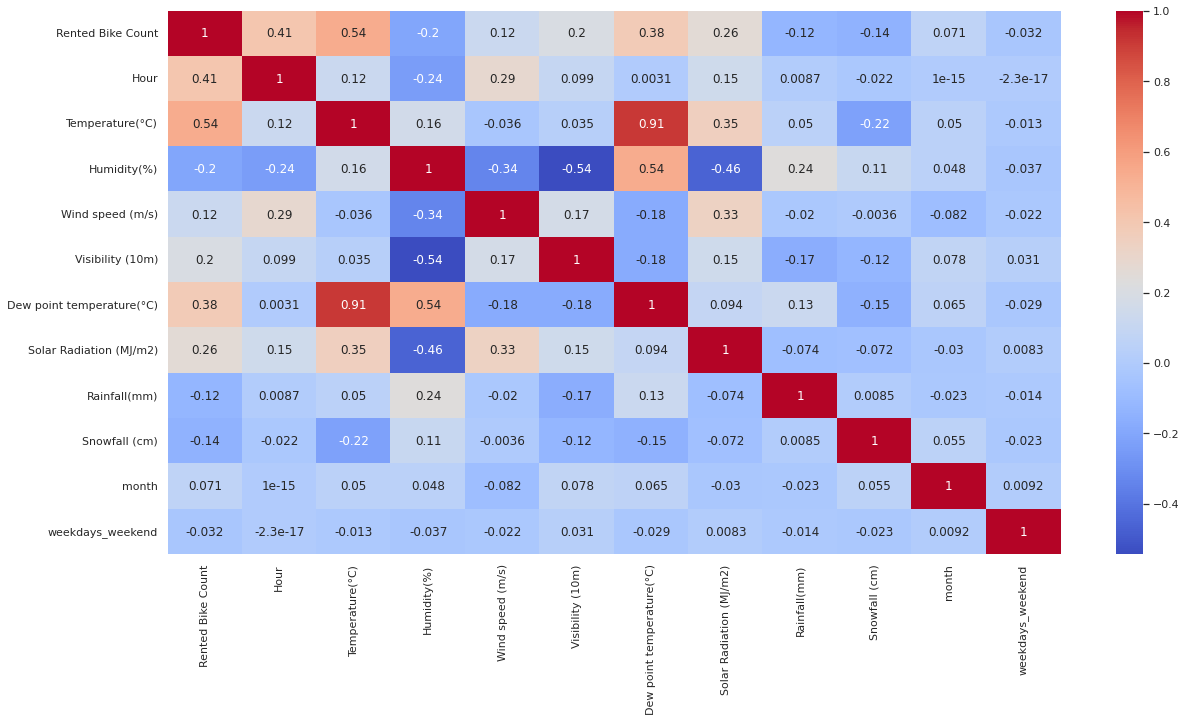

In [90]:
#constructing heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

**Humidity has low correlation with visibility due to solar radiation.
Dew point temperature and temperature are highly co-related.**

In [91]:
#Dropping highly correlated feature for eliminating Multi-colinearity
df = df.drop(['Dew point temperature(°C)'],axis=1)

**Exploratory Data Analysis**

**Univarite Analysis:**

In [92]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


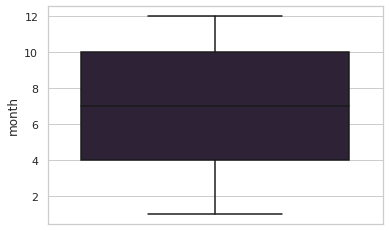

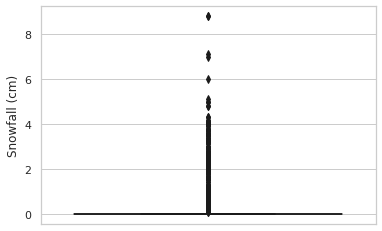

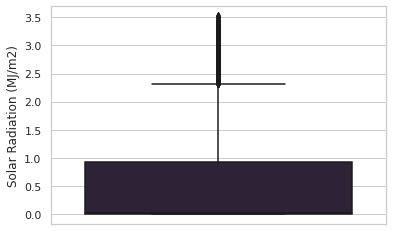

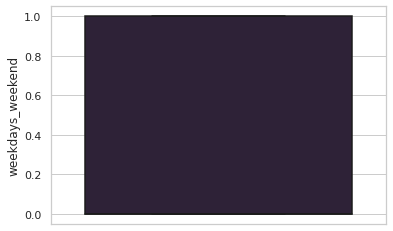

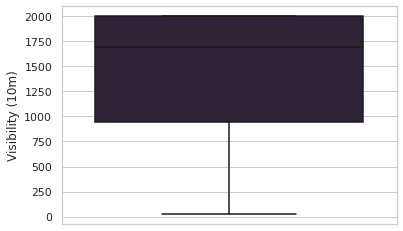

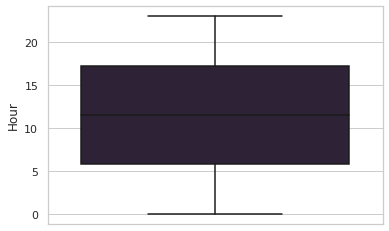

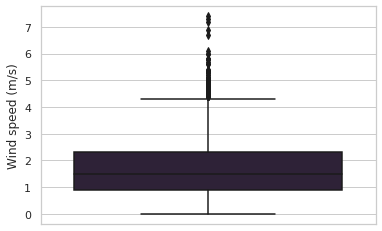

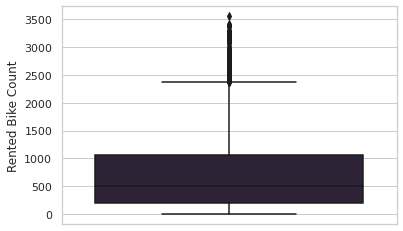

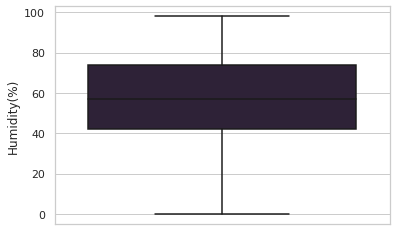

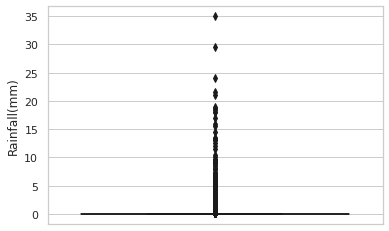

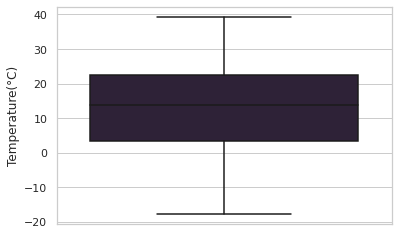

In [93]:
#Numerical features plotting
num_var = list(set(df.describe()))
for i in num_var:
  sns.boxplot(y= df[i])
  plt.show()

In [94]:
#categorical feature plotting
cat_var = list(set(df.describe(include = 'all')) - set(df.describe()))
cat_var

['Functioning Day', 'Holiday', 'Seasons']

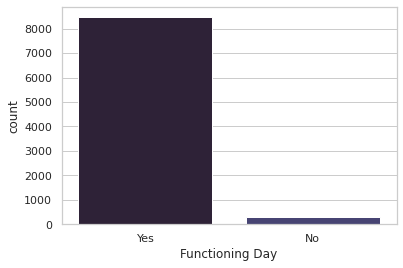

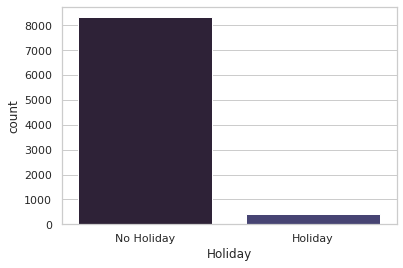

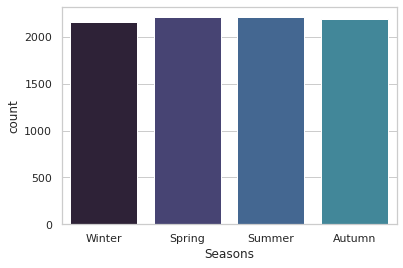

In [95]:
for i in cat_var:
  sns.countplot(x = df[i],)
  plt.show()

**Bivariate Analysis:**

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

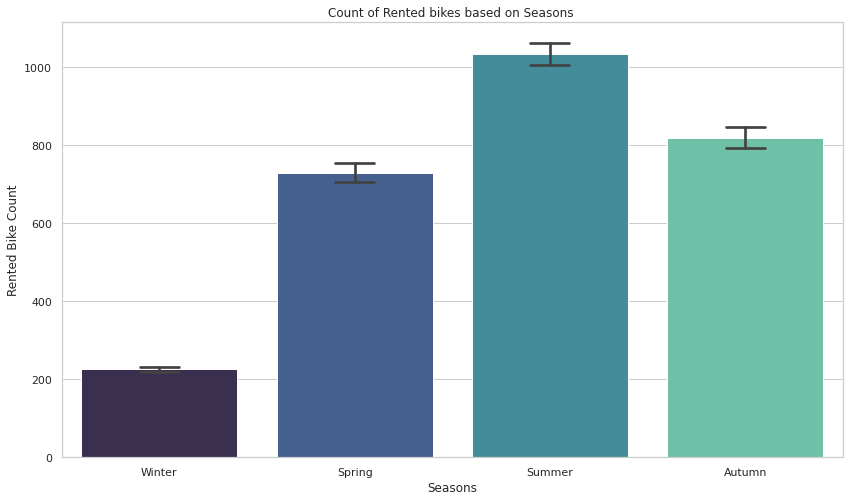

In [96]:
#analysis of data by vizualisation using seasons and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Seasons ')

**Conclusions:**

1. **Most bikes have been rented in the Summer Season.**
2. **Least bike rent count is in winter season.**
3. **Autumn and Spring Seasons have almost equal amounts of bike rent count.**

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

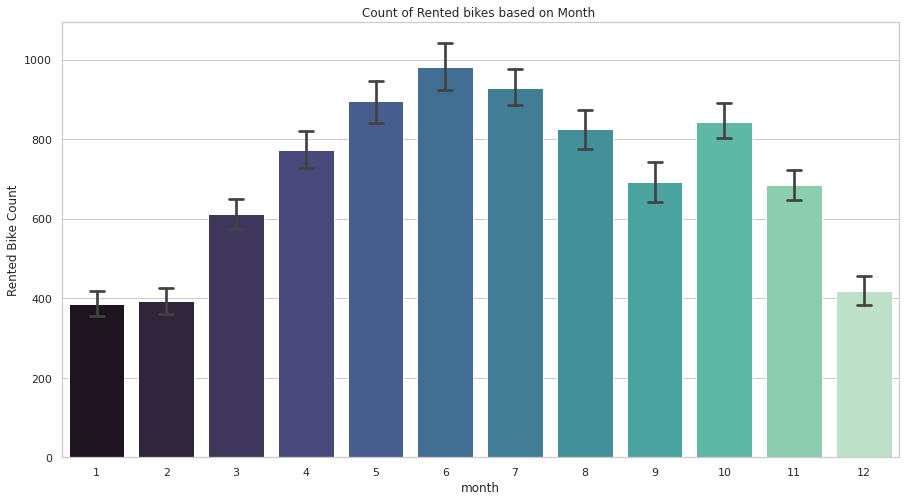

In [97]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Month ')

**The demand of the rented bike is high between 5 to 10 as compared to other month.**

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

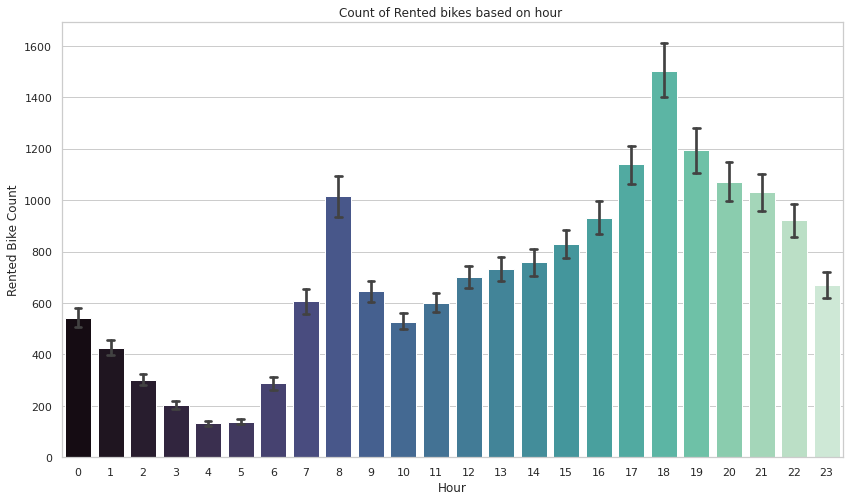

In [98]:
#anlysis of rented bike count on basis of hour.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on hour ')

**Observation:**
**People generally use rented bikes during their working hour from 7am to 9am and 5pm to 8pm.**

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

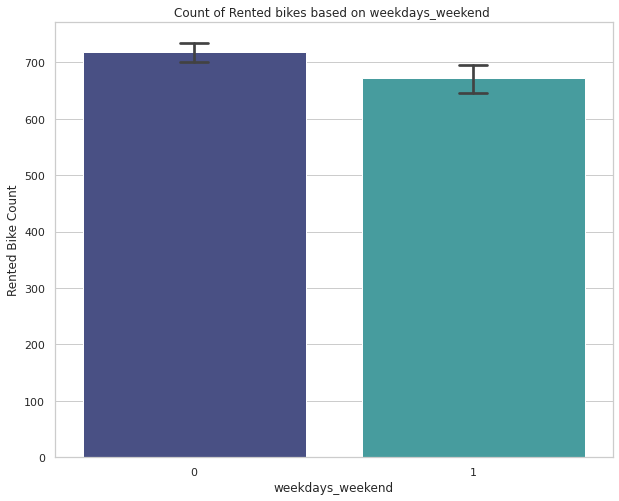

In [99]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

**In weekdays demand of bike is higher as compared to weekends.**

In [100]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


[Text(0.5, 1.0, 'Count of Rented bikes based on Functioning_Day ')]

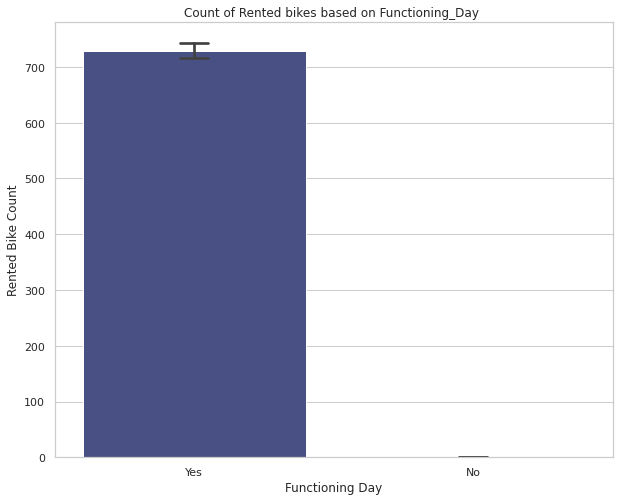

In [101]:
#anlysis of data by vizualisation using functioning day and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on Functioning_Day ')

**Observation: People use rented bike only in functioning day.**

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

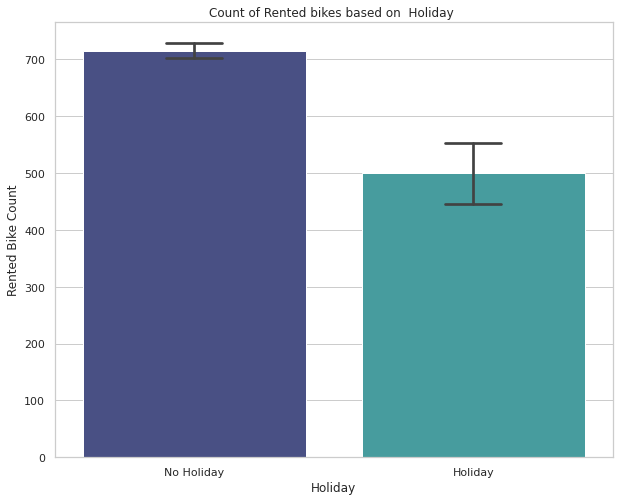

In [102]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

**Observation: Use of rented bike is more on 'No holiday' means on working days as compared to 'Holiday'.**

**Visualizing The Distributions**

**Visualizing numerical variables distplot:**

In [103]:
#assigning numerical coulmn to variable
num_feat= list(set(df.describe()))
num_feat

['month',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'weekdays_weekend',
 'Visibility (10m)',
 'Hour',
 'Wind speed (m/s)',
 'Rented Bike Count',
 'Humidity(%)',
 'Rainfall(mm)',
 'Temperature(°C)']

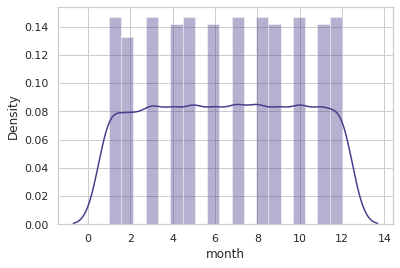

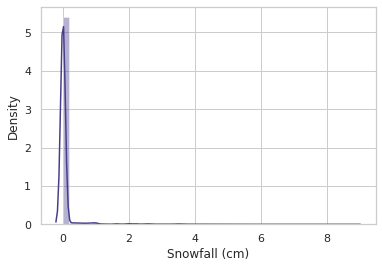

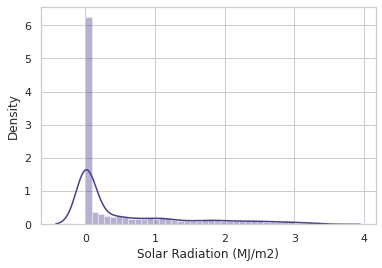

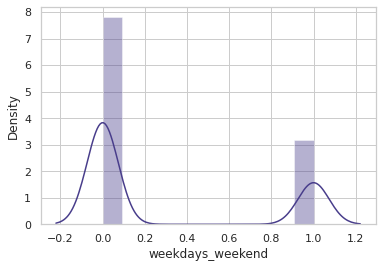

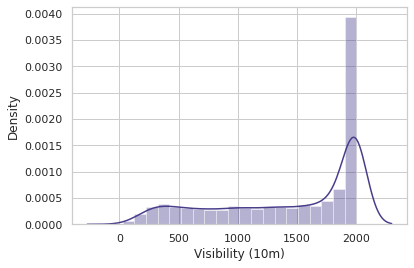

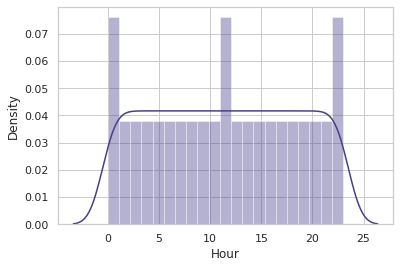

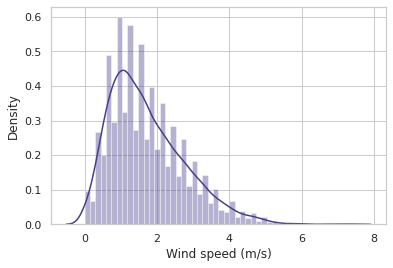

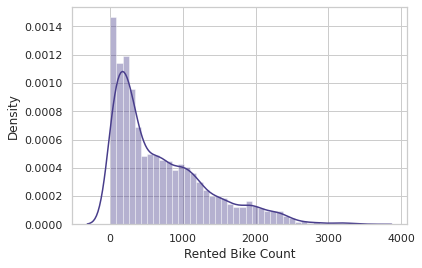

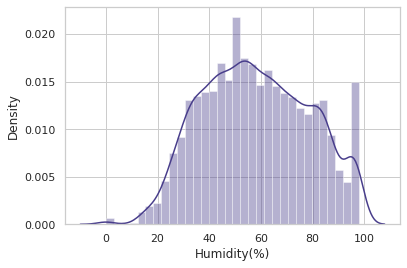

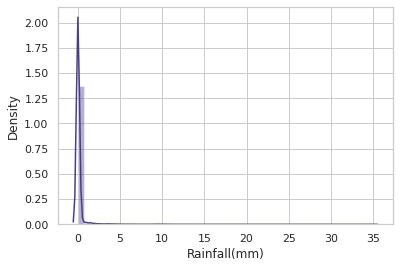

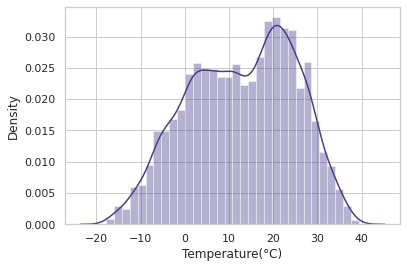

In [104]:
#plotting distplots to analyze the distribution of all numerical 
for col in num_feat:
  plt.figure(figsize=(6,4))
  sns.distplot(x=df[col],color='darkslateblue')
  plt.xlabel(col)
plt.show()

**Observation: Some of the distributions are rightly skewed while some are leftly skewed.**

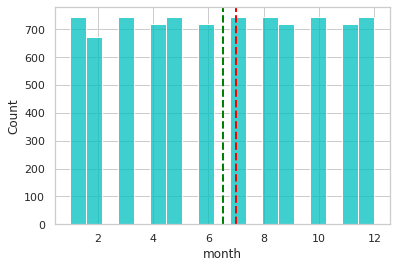

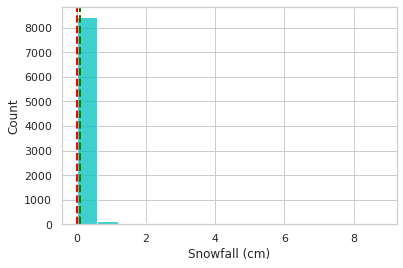

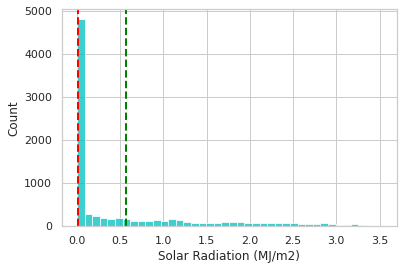

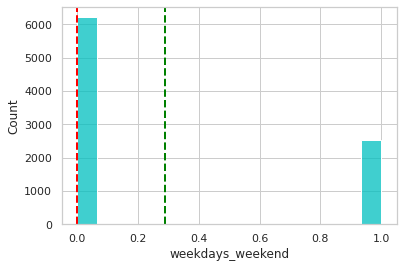

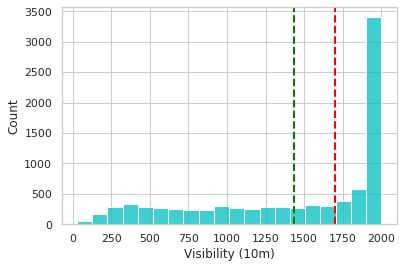

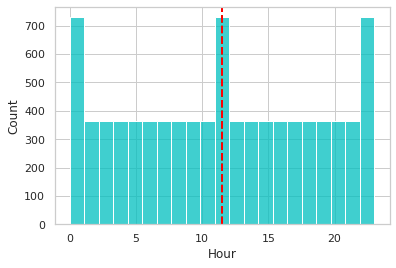

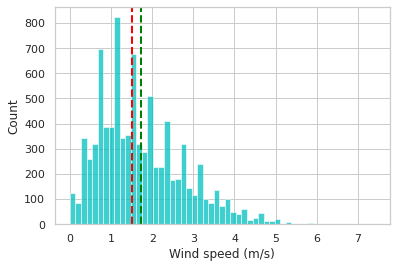

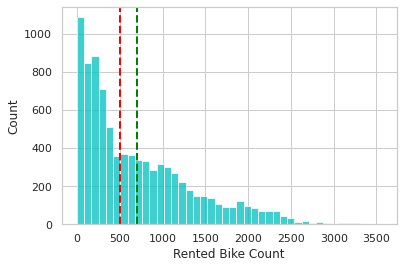

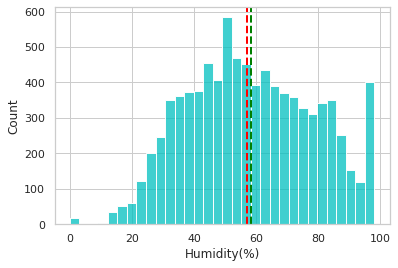

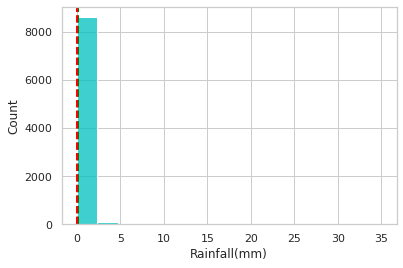

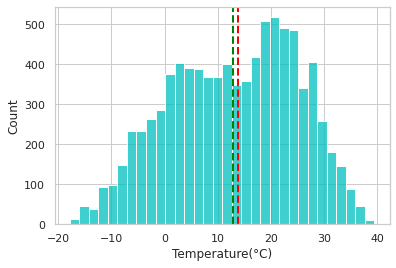

In [105]:
#plotting histogram with mean and median

for col in num_feat[:]:
  sns.histplot(df[col],color= 'c')
  plt.axvline(df[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

**Observation: The feature which are skewed,their mean and median are also skewed.**

##**Regression Plotting Of Features**

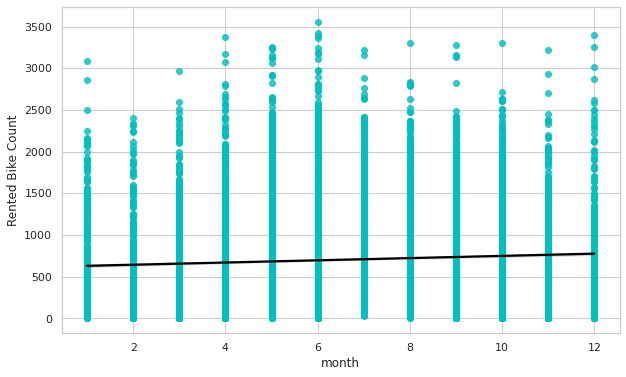

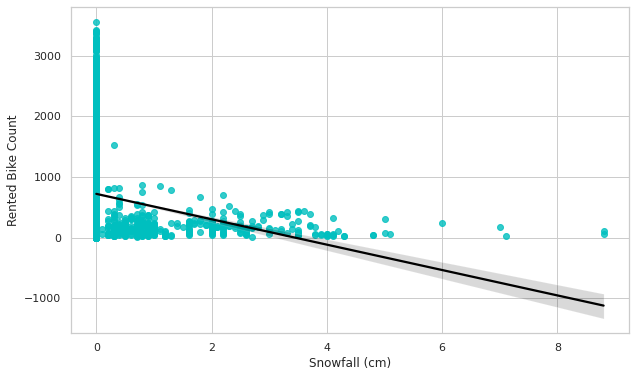

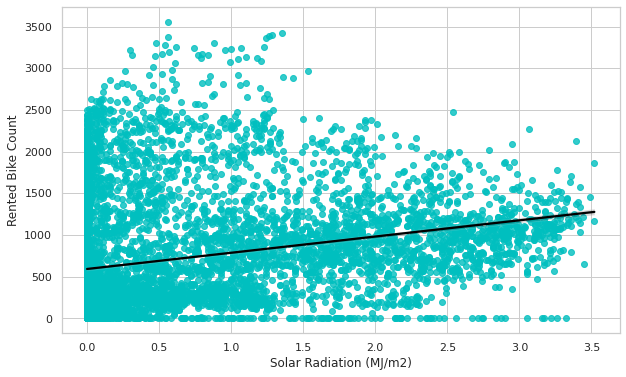

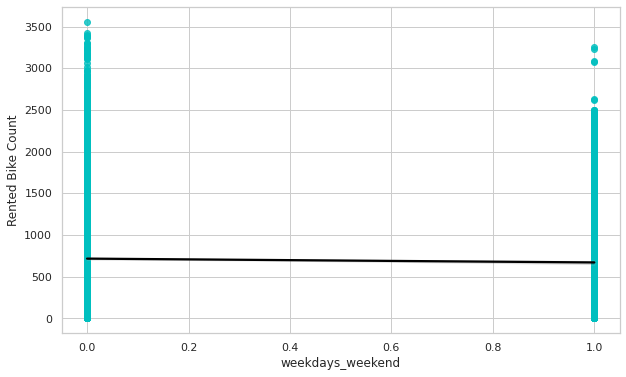

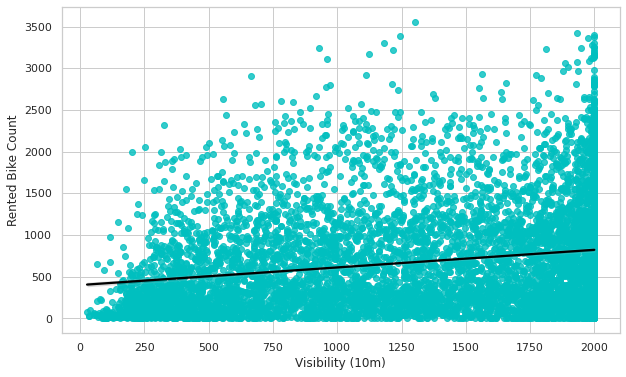

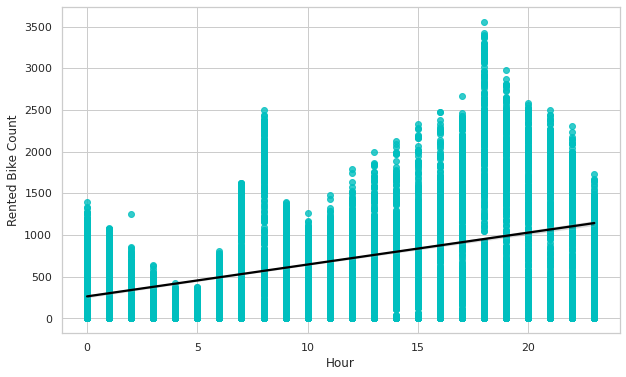

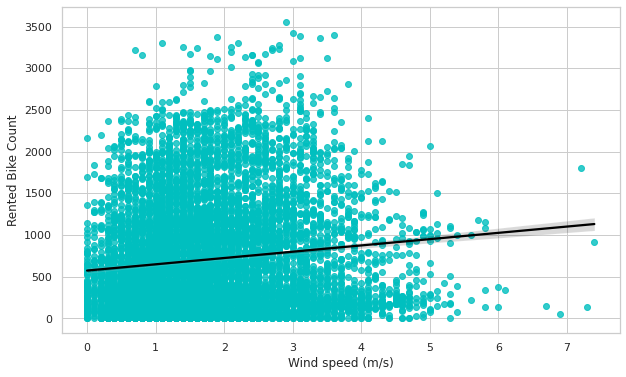

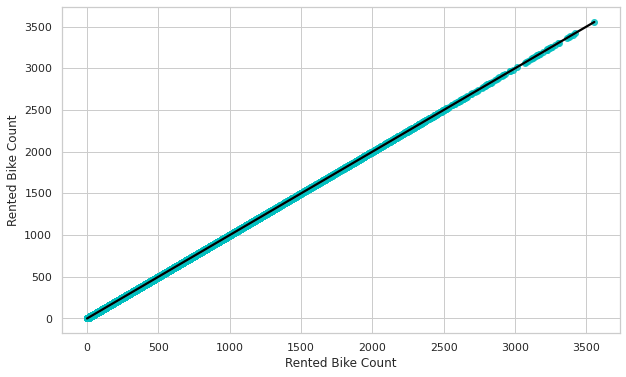

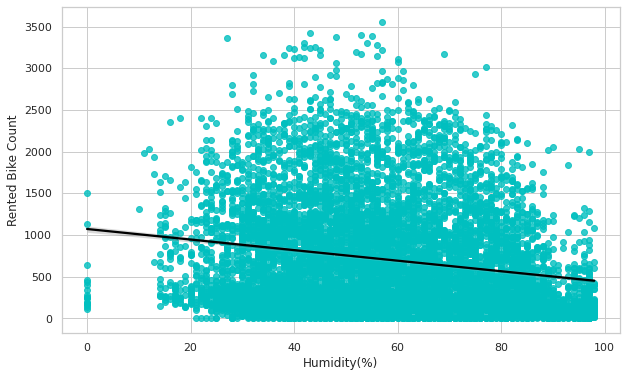

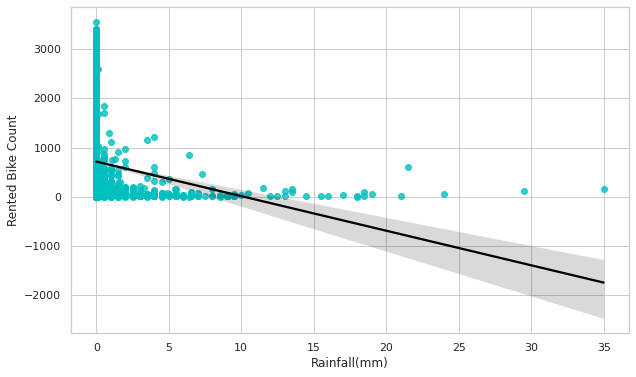

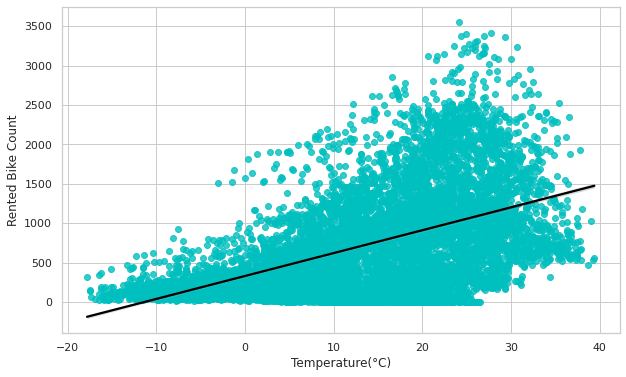

In [106]:
#plotting the regression plot for all the numerical features
for col in num_feat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

Observations: 
* The columns 'Hour','Temperature','Wind Speed', 'Visibility', and 'Solar Radiation' are positively related to the dependent variable which means that rented bike count increases with increase of these features.

* Whereas, the columns 'Ranfaill', 'Snowfall','Humidity' are those features which are negatively related with dependent variable, which implies that rented bike count decreases when these features increases.

**Normalising Rented Bike Count Column Data.**

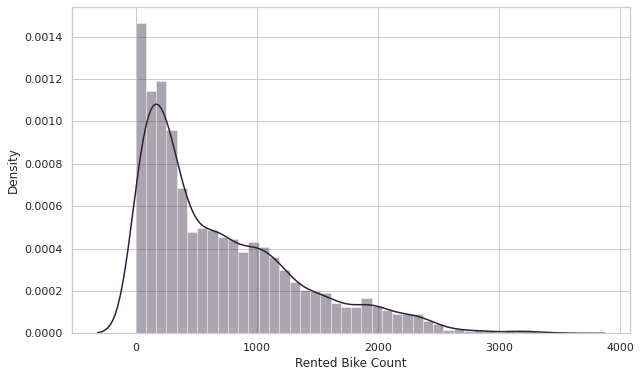

In [107]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(df['Rented Bike Count'])

**Observations:**


*   **Rented Bike Count has moderate skewness towards right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.**




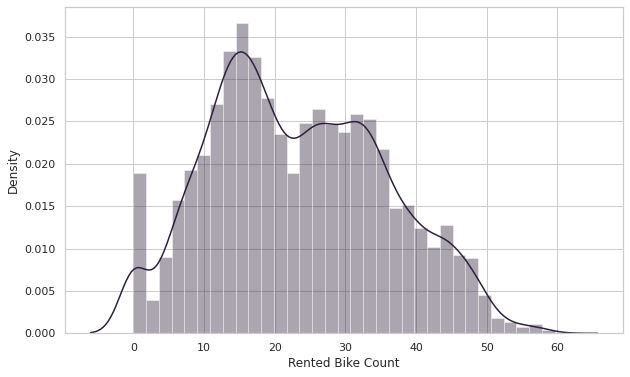

In [108]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df['Rented Bike Count']))

After applying the square rooting the skewed rental bike count, we almost got normal distribution.

**Creating dummy variables and performing the one hot encoding to the dataset**

In [109]:
#Changing the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

In [111]:
#using pandas get dummies for encoding categorical features

df1= pd.get_dummies(df, drop_first = True, sparse = True)
df1.head()


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Model Training**

In [112]:
#Data splitting and value assigninh to variables fo Regression
X = df1.drop(columns = ['Rented Bike Count'] , axis = 1)
y = np.sqrt(df1['Rented Bike Count'])

In [113]:
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

**Implementing Linear Regression**

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape

(6570, 47)


(2190, 47)

In [116]:
# initalizing the model
regg = LinearRegression().fit(X_train,y_train)

In [117]:
# Checking score
regg.score(X_train,y_train)

0.7557884266778845

In [118]:
#Checking Coefficent
regg.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [119]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

In [120]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.60630594639787
RMSE : 6.132398058377968
MAE : 4.658244745512172
R2 : 0.7557884266778845
Adjusted R2 : 0.7504299094294534


In [121]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

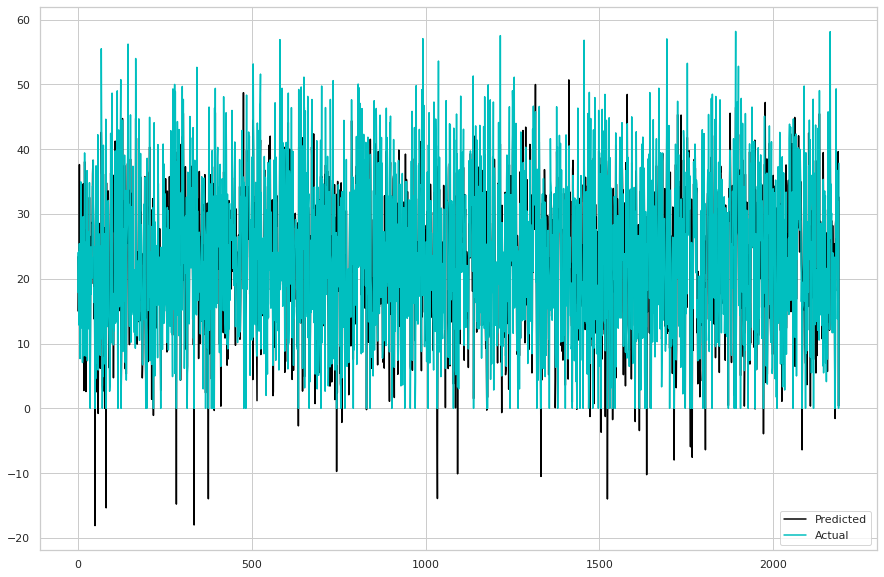

In [122]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

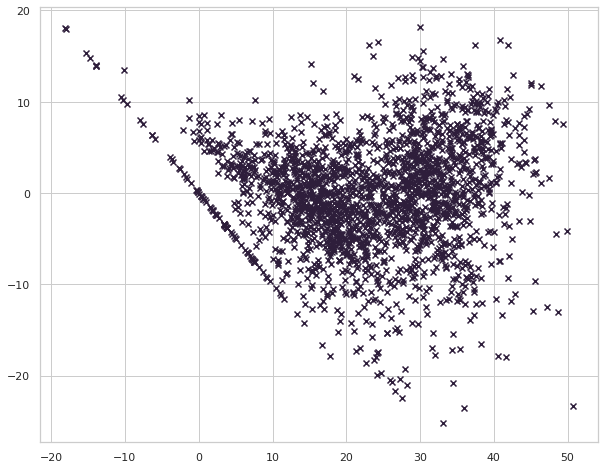

In [123]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

**Implementing Ridge Regression(L2 Regularization)**

In [124]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [125]:
#checking score

ridge.score(X_train,y_train)

0.7557883433655243

In [126]:
# Predicted Train & Test values

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [127]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.60631877572478
RMSE : 6.13239910440643
MAE : 4.658340946942368
R2 : 0.7557883433655243
Adjusted R2 : 0.7504298242890441


In [128]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [129]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.646577616668694
RMSE : 6.053641682216473
MAE : 4.658618929538894
R2 : 0.7680103057317668
Adjusted R2 : 0.7629199623001108


In [134]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df = test_df.append(dict2,ignore_index=True)

NameError: ignored

**Implementing Lasso regression(L1 regulazation)**

In [135]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.3873692800799008
0.40519624904934015


In [136]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [137]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


In [138]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [139]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


In [140]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

NameError: ignored